In [1]:
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
from scipy.io import loadmat

In [2]:
data_path = "data/"


def load_data(path):
    """
    Read the raw data
    :param path: file location
    :return: X, y
    """
    data = loadmat(path)
    return data["X"], data["y"]

def plot_image(img, labels, n):
    """
    Debug function, display images
    :param img: X
    :param labels: y
    :param n: NB. images
    """
    fig, axes = plt.subplots(1, n, figsize=(20, 20))
    axes = axes.flatten()
    for i, ax in enumerate(axes):
        if img[i].shape == (32, 32, 3):
            ax.imshow(img[i])
        else:
            ax.imshow(img[i], cmap="gray")
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_title(labels[i])

def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.144])

In [3]:
# Loading the data
X_train, y_train = load_data(f"{data_path}train_32x32.mat")
X_test, y_test = load_data(f"{data_path}test_32x32.mat")

# Transposes arrays to a readable/conventional format
X_train, y_train = X_train.transpose((3,0,1,2)), y_train[:,0]
X_test, y_test = X_test.transpose((3,0,1,2)), y_test[:,0]

In [119]:
X_train.shape

(73257, 32, 32, 3)

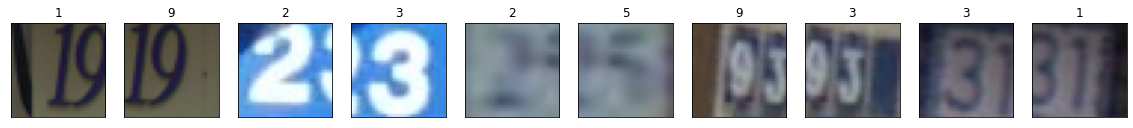

In [174]:
plot_image(X_train, y_train, 10)

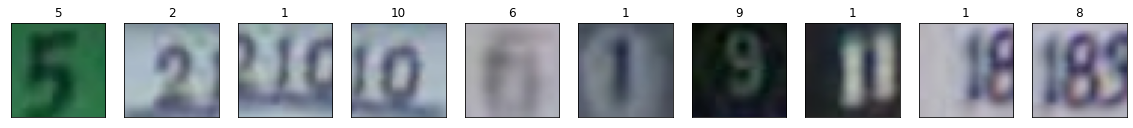

In [106]:
plot_image(X_test, y_test, 10)

In [4]:
# Replaces values of targets from 10 to 0
y_train[y_train == 10] = 0
y_test[y_test == 10] = 0

# Converts to gray scale
X_train = rgb2gray(X_train)
X_test = rgb2gray(X_test)

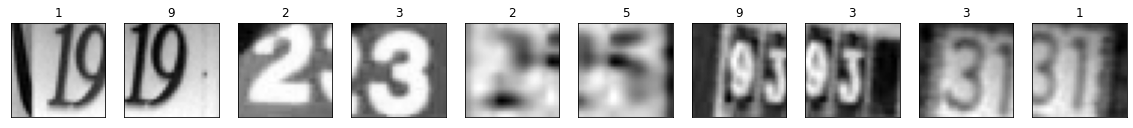

In [179]:
plot_image(X_train, y_train, 10)

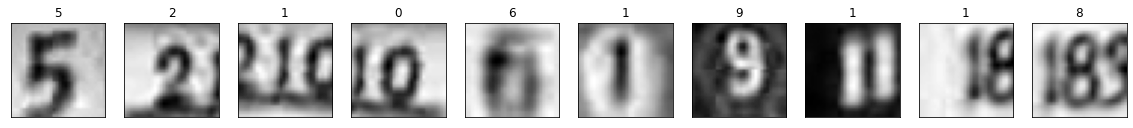

In [126]:
plot_image(X_test, y_test, 10)

<AxesSubplot:title={'center':'Test Set'}, ylabel='Count'>

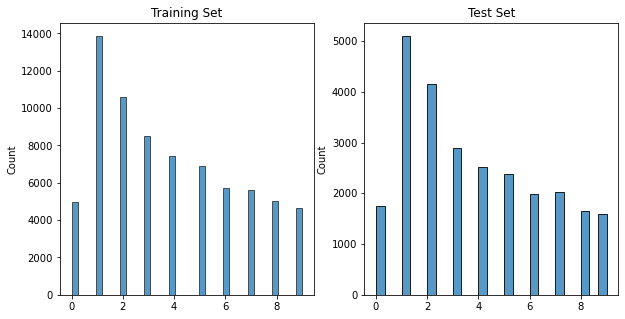

In [135]:
# See how's the distribution of the train/test set
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].set_title("Training Set")
axes[1].set_title("Test Set")
sns.histplot(y_train, ax=axes[0])
sns.histplot(y_test, ax=axes[1])

In [5]:
# Standardisation
train_mean = np.mean(X_train, axis=0)
train_std = np.std(X_train, axis=0)

X_train = (X_train - train_mean) / train_std
X_test = (X_test - train_mean)  / train_std

In [6]:
# Expands dims to works with Keras later
X_train = np.expand_dims(X_train, axis=3)
X_test = np.expand_dims(X_test, axis=3)

In [7]:
# Encoding target using OneHotEncoder
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder().fit(y_train.reshape(-1, 1))

y_train = enc.transform(y_train.reshape(-1, 1)).toarray()
y_test = enc.transform(y_test.reshape(-1, 1)).toarray()

In [8]:
# Saving data
np.save(f"{data_path}/single/X_train.npy", X_train)
np.save(f"{data_path}/single/X_test.npy", X_test)
np.save(f"{data_path}/single/y_train.npy", y_train)
np.save(f"{data_path}/single/y_test.npy", y_test)